___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Alexandre Edington

## Bruno Cury

## Matheus Soares

___

___

## INTRODUÇÃO


Não vem de hoje o grande interesse da sociedade em vídeo games, porém, há aproximadamente dez anos atrás, a visão que tínhamos sobre o ato de jogar vídeo game e sua indústria era completamente diferente.
Em 2007 os jogos com maiores ambições comerciais projetavam um lucro multimilionário e a venda dos mesmos era feita através de discos que seriam rodados em seu console de preferência.
Hoje em dia os consoles são apenas uma parcela do vasto universo de aparelhos que rodam vídeo games, e a venda destes jogos já não se da mais por discos, sua grande maioria vem de downloads e seus lucros são projetados na faixa dos biliões de dólares. Os videogames são agora, onipresentes em nossas vidas, qualquer um com um smartphone tem acesso a uma variedade de jogos, disponíveis na plataforma de download do seu sistema operacional (iOS, Android, google play), ou até nas redes sociais como Facebook, que se tornou uma grande plataforma de jogos online. 
Com isso em mente, resolvemos analisar os dados da maior plataforma de download de vídeo games da internet, afim de quantificar o impacto dos jogos no mundo por meio da análise de suas características mais importantes. E então, a partir desta análise, predizer o sucesso (ou falta dele) na arrecadação mundial de algum jogo, através do input de algumas de suas características.

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

Os dados utilizados neste experimento foram retirados na integra do site data.world, onde são disponibilizados diversos bancos de dados; o Dataset escolhido é inteiramente referente às características dos jogos disponíveis na plataforma Steam. Inicialmente, o banco de dados em questão contava com mais de 70 variáveis e uma ampla quantidade de dados, porém o mesmo precisou ser filtrado, em prol da eficiência e organização foi feita a retirada de variáveis indesejadas e a retirada de dados nulos. Escolhemos também agrupar algumas variáveis, como as entradas de gênero (Indie, Action, Adventure, Casual, Strategy, RPG, Simulation, Sports, Racing), que se tornaram uma só variável, assim como a compatibilidade com Mac, Linux e Windows se tornaram uma só entrada.

In [4]:
import pandas as pd
import os
from collections import Counter
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math as math


In [5]:
df = pd.read_csv("games-features.csv",error_bad_lines=False,sep=";")

### BASE DE DADOS

In [6]:
dados = pd.DataFrame()
dados["NOME"] = df["ResponseName"]
dados["LANCAMENTO"] = df["ReleaseDate"]
dados["ACHIEVEMENTS"] = df["AchievementCount"]
dados["LINGUAS"] = df["SupportedLanguages"]
dados["LINGUAS_N"] = df["SupportedLanguages"]
dados["INDIE"] = df["GenreIsIndie"]
dados["ACTION"] = df["GenreIsAction"]
dados["ADVENTURE"] = df["GenreIsAdventure"]
dados["CASUAL"] = df["GenreIsCasual"]
dados["STRATEGY"] = df["GenreIsStrategy"]
dados["RPG"] = df["GenreIsRPG"]
dados["SIMULATION"] = df["GenreIsSimulation"]
dados["SPORTS"] = df["GenreIsSports"]
dados["RACING"] = df["GenreIsRacing"]
dados["NUM_PROPRIETARIOS"] = df["SteamSpyOwners"]
dados["PRECO_INICIAL"] = df["PriceInitial"]
dados["PRECO_FINAL"] = df["PriceFinal"]

In [7]:
remover=["with","full","audio","support","Traditional","Simplified"]

for i in range(len(dados)):
    tempa=dados.LINGUAS_N[i].split(" ")
    for a in remover:
        if a in tempa:
            tempa.remove(a)
    dados.LINGUAS_N[i]=len(tempa)

C:\Users\Bruno\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
def Plataforma(df):
    a = df.PlatformWindows
    b = df.PlatformMac
    c = df.PlatformLinux
    
    if (a == "VERDADEIRO" and b == "VERDADEIRO" and c == "VERDADEIRO"): return "Windows Linux Mac"
    elif (a == "VERDADEIRO" and b == "VERDADEIRO" and c == "FALSO"): return "Windows Mac"
    elif (a == "VERDADEIRO" and b == "FALSO" and c == "FALSO"): return "Windows"
    elif (a == "FALSO" and b == "VERDADEIRO" and c == "VERDADEIRO"): return "Mac Linux"
    elif (a == "FALSO" and b == "VERDADEIRO" and c == "FALSO"): return "Mac"
    elif (a == "VERDADEIRO" and b == "FALSO" and c == "VERDADEIRO"): return "Windows Linux"
    elif (a == "FALSO" and b == "FALSO" and c == "VERDADEIRO"): return "Linux"
    else: return "Nenhuma Plataforma"

Input = df.apply(Plataforma,axis=1)
dados["PLATAFORMAS"] = Input


def Jogabilidade(df):
    a = df.CategoryMultiplayer
    b = df.CategorySinglePlayer
    c = df.CategoryCoop
    
    if (a == "VERDADEIRO" and b == "VERDADEIRO" and c == "VERDADEIRO"): return "MultiPlayer SinglePlayer Coop"
    elif (a == "VERDADEIRO" and b == "VERDADEIRO" and c == "FALSO"): return "MultiPlayer  SinglePlayer"
    elif (a == "VERDADEIRO" and b == "FALSO" and c == "FALSO"): return "MultiPlyer"
    elif (a == "FALSO" and b == "VERDADEIRO" and c == "VERDADEIRO"): return "SinglePlayer Coop"
    elif (a == "FALSO" and b == "VERDADEIRO" and c == "FALSO"): return "SinglePlayer"
    elif (a == "VERDADEIRO" and b == "FALSO" and c == "VERDADEIRO"): return "MultiPlayer Coop"
    elif (a == "FALSO" and b == "FALSO" and c == "VERDADEIRO"): return "Coop"
    else: return "N/"
    
Input2 = df.apply(Jogabilidade,axis=1)
dados["JOGABILIDADE"] = Input2



### ANÁLISE DESCRITIVA

In [28]:
dados.loc[(dados.PRECO_INICIAL < 999), "QUALIFICACAO"] = "A"
dados.loc[(dados.PRECO_INICIAL > 999) & (dados.PRECO_INICIAL <15999), "QUALIFICACAO"] = "AA"
dados.loc[(dados.PRECO_INICIAL > 15999), "QUALIFICACAO"] = "AAA"

dados.loc[(dados.NUM_PROPRIETARIOS < 25000), "FAIXA_VENDAS"] = "De 0 a 50 mil"
dados.loc[(dados.NUM_PROPRIETARIOS > 25000) & (dados.NUM_PROPRIETARIOS <50000), "FAIXA_VENDAS"] = "De 25 a 50 mil"
dados.loc[(dados.NUM_PROPRIETARIOS > 50000) & (dados.NUM_PROPRIETARIOS <100000), "FAIXA_VENDAS"] = "De 50 a 100 mil"
dados.loc[(dados.NUM_PROPRIETARIOS > 100000) & (dados.NUM_PROPRIETARIOS <500000), "FAIXA_VENDAS"] = "De 100 a 500 mil"
dados.loc[(dados.NUM_PROPRIETARIOS > 500000) & (dados.NUM_PROPRIETARIOS <1000000), "FAIXA_VENDAS"] = "De 500 mil a 1 milhão"
dados.loc[(dados.NUM_PROPRIETARIOS > 1000000) & (dados.NUM_PROPRIETARIOS <5000000), "FAIXA_VENDAS"] = "De 1 a 5 milhões"
dados.loc[(dados.NUM_PROPRIETARIOS > 5000000) & (dados.NUM_PROPRIETARIOS <10000000), "FAIXA_VENDAS"] = "De 5 a 10 milhões"
dados.loc[(dados.NUM_PROPRIETARIOS > 10000000) & (dados.NUM_PROPRIETARIOS <15000000), "FAIXA_VENDAS"] = "De 10 a 15 milhões"
dados.loc[(dados.NUM_PROPRIETARIOS > 20000000), "FAIXA_VENDAS"] = "mais de 20 milhões"



In [30]:
pd.crosstab(dados.QUALIFICACAO,)

,NOME,LANCAMENTO,ACHIEVEMENTS,LINGUAS,LINGUAS_N,INDIE,ACTION,ADVENTURE,CASUAL,STRATEGY,...,SPORTS,RACING,NUM_PROPRIETARIOS,PRECO_INICIAL,PRECO_FINAL,PLATAFORMAS,JOGABILIDADE,QUALIFICACAO,FAIXAS_VENDAS,FAIXA_VENDAS
0,Counter-Strike,01/11/2000,0,English French German Italian Spanish Simplifi...,8,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,...,FALSO,FALSO,13033334,999,999,Windows Linux Mac,MultiPlyer,NaN,De 500 mil a 1 milhão,De 10 a 15 milhões
1,Team Fortress Classic,01/04/1999,0,English French German Italian Spanish,5,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,...,FALSO,FALSO,5399140,499,499,Windows Linux Mac,MultiPlyer,A,De 500 mil a 1 milhão,De 5 a 10 milhões
2,Day of Defeat,01/05/2003,0,English French German Italian Spanish,5,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,...,FALSO,FALSO,7621102,499,499,Windows Linux Mac,MultiPlyer,A,De 500 mil a 1 milhão,De 5 a 10 milhões
3,Deathmatch Classic,01/06/2001,0,English French German Italian Spanish,5,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,...,FALSO,FALSO,7498965,499,499,Windows Linux Mac,MultiPlyer,A,De 500 mil a 1 milhão,De 5 a 10 milhões
4,Half-Life: Opposing Force,01/11/1999,0,English French German Korean,4,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,...,FALSO,FALSO,5399499,499,499,Windows Linux Mac,MultiPlayer SinglePlayer,A,De 500 mil a 1 milhão,De 5 a 10 milhões
5,Ricochet,01/11/2000,0,English French German Italian Spanish,5,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,...,FALSO,FALSO,7488563,499,499,Windows Linux Mac,MultiPlyer,A,De 500 mil a 1 milhão,De 5 a 10 milhões
6,Half-Life,08/11/1998,0,English French German Italian Spanish Simplifi...,8,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,...,FALSO,FALSO,5927504,999,999,Windows Linux Mac,MultiPlayer SinglePlayer,NaN,De 500 mil a 1 milhão,De 5 a 10 milhões
7,Counter-Strike: Condition Zero,01/03/2004,0,English French German Italian Spanish Simplifi...,8,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,...,FALSO,FALSO,10489261,999,999,Windows Linux Mac,MultiPlayer SinglePlayer,NaN,De 500 mil a 1 milhão,De 10 a 15 milhões
8,Counter-Strike: Condition Zero,01/03/2004,0,English French German Italian Spanish Simplifi...,8,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,...,FALSO,FALSO,10489261,999,999,Windows Linux Mac,MultiPlayer SinglePlayer,NaN,De 500 mil a 1 milhão,De 10 a 15 milhões
9,Half-Life: Blue Shift,01/06/2001,0,English French German,3,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,...,FALSO,FALSO,5368650,499,499,Windows Linux Mac,SinglePlayer,A,De 500 mil a 1 milhão,De 5 a 10 milhões


In [10]:
Vendas_Windows = dados[dados.PLATAFORMAS == "Windows"].NUM_PROPRIETARIOS.sum()
Vendas_Mac = dados[dados.PLATAFORMAS == "Mac"].NUM_PROPRIETARIOS.sum()
Vendas_Linux = dados[dados.PLATAFORMAS == "Linux"].NUM_PROPRIETARIOS.sum()
Vendas_WLM = dados[dados.PLATAFORMAS == "Windows Linux Mac"].NUM_PROPRIETARIOS.sum()
Vendas_WM = dados[dados.PLATAFORMAS == "Windows Mac"].NUM_PROPRIETARIOS.sum()
Vendas_WL = dados[dados.PLATAFORMAS == "Windows Linux"].NUM_PROPRIETARIOS.sum()

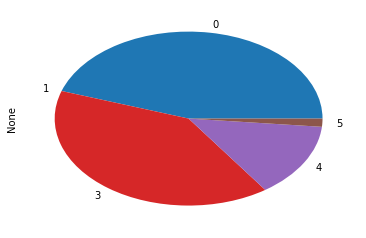

In [11]:
l_Vendas_Plat = [Vendas_Windows,Vendas_Mac,Vendas_Linux,Vendas_WLM,Vendas_WM,Vendas_WL]
l_Vendas_Plat = pd.Series(l_Vendas_Plat)
l_Vendas_Plat.plot(kind = "pie")

In [12]:
Vendas_M = dados[dados.JOGABILIDADE == "MultiPlayer"].NUM_PROPRIETARIOS.sum()
Vendas_S = dados[dados.JOGABILIDADE == "SinglePlayer"].NUM_PROPRIETARIOS.sum()
Vendas_C = dados[dados.JOGABILIDADE == "Coop"].NUM_PROPRIETARIOS.sum()
Vendas_MSC = dados[dados.JOGABILIDADE == "MultiPlayer SinglePlayer Coop"].NUM_PROPRIETARIOS.sum()
Vendas_MS = dados[dados.JOGABILIDADE == "MultiPlayer SinglePlayer"].NUM_PROPRIETARIOS.sum()
Vendas_MC = dados[dados.JOGABILIDADE == "MultiPlayer Coop"].NUM_PROPRIETARIOS.sum()
Vendas_SC = dados[dados.JOGABILIDADE == "SinglePlayer Coop"].NUM_PROPRIETARIOS.sum()

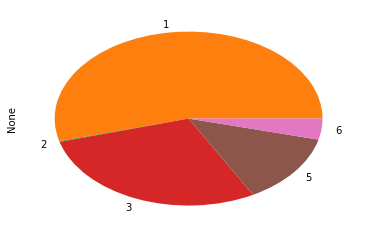

In [13]:
l_Vendas_Jog = [Vendas_M,Vendas_S,Vendas_C,Vendas_MSC,Vendas_MS,Vendas_MC,Vendas_SC]
l_Vendas_Jog = pd.Series(l_Vendas_Jog)
l_Vendas_Jog.plot(kind = "pie")

In [14]:
dados.QUALIFICACAO.value_counts()

A      8033
AA     3117
AAA       4
Name: QUALIFICACAO, dtype: int64

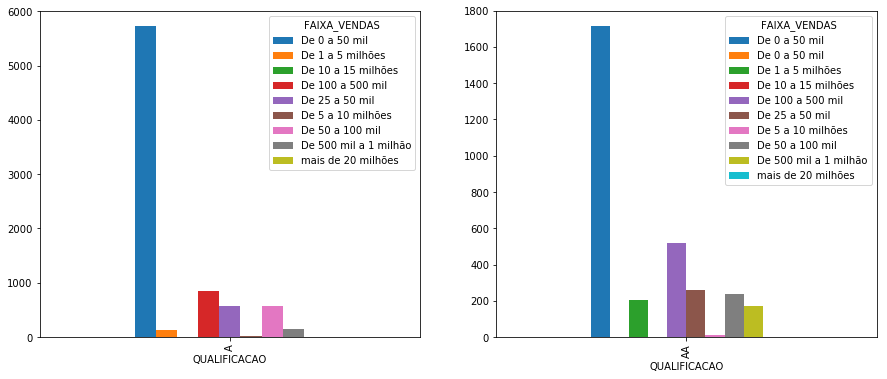

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2 )

a = pd.crosstab(dados[dados.QUALIFICACAO == "A"].QUALIFICACAO,dados.FAIXA_VENDAS)
a.plot(kind = "bar",ax = axes[0],figsize = (15,6))

b = pd.crosstab(dados[dados.QUALIFICACAO == "AA"].QUALIFICACAO,dados.FAIXA_VENDAS)
b.plot(kind = "bar",ax = axes[1],figsize = (15,6))

___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

In [16]:
#MODELO DE PREDICAO PELA MEDIA

y = dados.NUM_PROPRIETARIOS.mean()
f = dados.NUM_PROPRIETARIOS.mean()
yi = dados.NUM_PROPRIETARIOS
n = len(dados)


# coeficiente de determinação (R2) E raiz do erro médio quadrático (RMS).
def CoefDet(y,f,yi):
    
    num = ((yi-f)**2).sum()
    den = ((yi-y)**2).sum()
    R2 = 1 - (num/den)
    
    return[R2]

def RSM(y,f,yi):
    som = ((yi-y)**2).sum()
    rsm = (1/n)*som
    
    return[rsm]


___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS